<a href="https://colab.research.google.com/github/teacherSsamko/DL-study/blob/main/%08w4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [4Ï£ºÏ∞®] Í∏∞Î≥∏Í≥ºÏ†ú: HuggingFaceÎ°ú Îëê Î¨∏Ïû•Ïùò ÎÖºÎ¶¨Ï†Å Î™®Ïàú Î∂ÑÎ•òÌïòÍ∏∞

Ïù¥Î≤à Í≥ºÏ†úÎäî ÏûêÏó∞Ïñ¥ task Ï§ë ÌïòÎÇòÏù∏ MNLIÎ•º Ìï¥Í≤∞ÌïòÎäî Î™®Îç∏ÏùÑ HuggingFaceÎ°ú ÌïôÏäµÌïòÎäî Í≤ÉÏûÖÎãàÎã§. MNLIÎ•º ÏöîÏïΩÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

- **ÏûÖÎ†•**: premiseÏóê Ìï¥ÎãπÌïòÎäî Î¨∏Ïû•Í≥º hypothesisÏóê Ìï¥ÎãπÌïòÎäî Î¨∏Ïû• Îëê Í∞úÍ∞Ä ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥ÏòµÎãàÎã§.
- **Ï∂úÎ†•:** Î∂ÑÎ•ò Î¨∏Ï†úÎ°ú, Îëê Î¨∏Ïû•Ïù¥ Îì§Ïñ¥ÏôîÏùÑ Îïå Îã§Ïùå ÏÑ∏ Í∞ÄÏßÄÎ•º ÏòàÏ∏°ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.
    - **Entailment:** Îëê Î¨∏Ïû•Ïóê ÎÖºÎ¶¨Ï†Å Î™®ÏàúÏù¥ ÏóÜÏäµÎãàÎã§.
    - **Neutral:** Îëê Î¨∏Ïû•ÏùÄ ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú Í¥ÄÎ†®Ïù¥ ÏóÜÏäµÎãàÎã§.
    - **Contradiction:** Îëê Î¨∏Ïû• ÏÇ¨Ïù¥Ïóê ÎÖºÎ¶¨Ï†Å Î™®ÏàúÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.

- ÌïôÏäµ ÎïåÎäî `train` splitÎßå ÌôúÏö©ÌïòÏÖîÏïº Ìï©ÎãàÎã§. ÎÇòÎ®∏ÏßÄ splitÏùÄ ÏÇ¨Ïö©Î∂àÍ∞ÄÏûÖÎãàÎã§.
- Validation dataÍ∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞, `train` splitÏóêÏÑú Í∞ÄÏ†∏Ïò§ÏÖîÏïº Ìï©ÎãàÎã§.
- `trainer.train()`Î•º ÌÜµÌï¥ ÌïôÏäµÎêú logÍ∞Ä ÎÇ®ÏïÑÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
- DatasetÏùò `validation_matched`Ïóê ÎåÄÌïú ÏÑ±Îä•ÏùÑ Ï∂úÎ†•ÌïòÍ≥†, 50%Î•º ÎÑòÍ∏∞ÏÖîÏïº Ìï©ÎãàÎã§.

In [1]:
!pip install transformers datasets evaluate accelerate scikit-learn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 31.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 9.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Fo

In [2]:
import random
import evaluate
import numpy as np

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Ï§ÄÎπÑ

In [4]:
ds = load_dataset("nyu-mll/glue", "mnli")
ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

(‚Ä¶)alidation_matched-00000-of-00001.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

(‚Ä¶)dation_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

test_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9847
    })
})

In [5]:
ds['train'][0]

{'premise': 'Conceptually cream skimming has two basic dimensions - product and geography.',
 'hypothesis': 'Product and geography are what make cream skimming work. ',
 'label': 1,
 'idx': 0}

## [MY CODE] EDA

max_len Í∞í ÏÑ§Ï†ïÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú premiseÏôÄ hypothesisÎ•º Ìïú Î¨∏Ïû•ÏúºÎ°ú Ìï©Ïπú Í∏∏Ïù¥Î•º Íµ¨Ìï©ÎãàÎã§.

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:
- ÏµúÎåÄ Í∏∏Ïù¥: 396
- ÌèâÍ∑† Í∏∏Ïù¥: 29.78

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (matched):
- ÏµúÎåÄ Í∏∏Ïù¥: 216
- ÌèâÍ∑† Í∏∏Ïù¥: 29.18


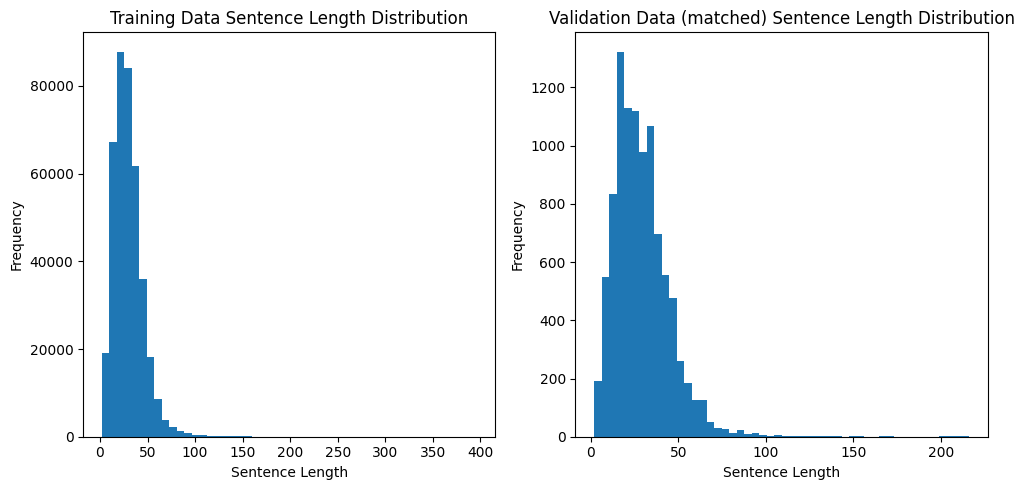

In [5]:
import matplotlib.pyplot as plt
from statistics import mean

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î¨∏Ïû• Í∏∏Ïù¥ Í≥ÑÏÇ∞
train_lengths = [len(p.split() + h.split()) for p, h in zip(ds['train']['premise'], ds['train']['hypothesis'])]
val_matched_lengths = [len(p.split() + h.split()) for p, h in zip(ds['validation_matched']['premise'], ds['validation_matched']['hypothesis'])]


# ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:")
print(f"- ÏµúÎåÄ Í∏∏Ïù¥: {max(train_lengths)}")
print(f"- ÌèâÍ∑† Í∏∏Ïù¥: {mean(train_lengths):.2f}")
print(f"\nÍ≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (matched):")
print(f"- ÏµúÎåÄ Í∏∏Ïù¥: {max(val_matched_lengths)}")
print(f"- ÌèâÍ∑† Í∏∏Ïù¥: {mean(val_matched_lengths):.2f}")

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_lengths, bins=50)
plt.title('Training Data Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(val_matched_lengths, bins=50)
plt.title('Validation Data (matched) Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## [LOG] ÎåÄÎ∂ÄÎ∂Ñ 100Ïûê Ïù¥ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê max lengthÎ•º 128ÏûêÎ°ú ÎëêÍ≥†, 128Ïûê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏô∏ÌïòÍ≥† ÌïôÏäµ

In [6]:
import datasets

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
filtered_train = ds['train'].filter(lambda x: len(x['premise'].split()) + len(x['hypothesis'].split()) < 128)

# ÌïÑÌÑ∞ÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞Ï°¥ Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉàÎ°úÏö¥ DatasetDictÏúºÎ°ú Í≤∞Ìï©
ds = datasets.DatasetDict({
    'train': filtered_train,
    'validation_matched': ds['validation_matched'],
    'validation_mismatched': ds['validation_mismatched'],
    'test_matched': ds['test_matched'],
    'test_mismatched': ds['test_mismatched']
})

Filter:   0%|          | 0/392702 [00:00<?, ? examples/s]

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:
- ÏµúÎåÄ Í∏∏Ïù¥: 127
- ÌèâÍ∑† Í∏∏Ïù¥: 29.56

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (matched):
- ÏµúÎåÄ Í∏∏Ïù¥: 216
- ÌèâÍ∑† Í∏∏Ïù¥: 29.18


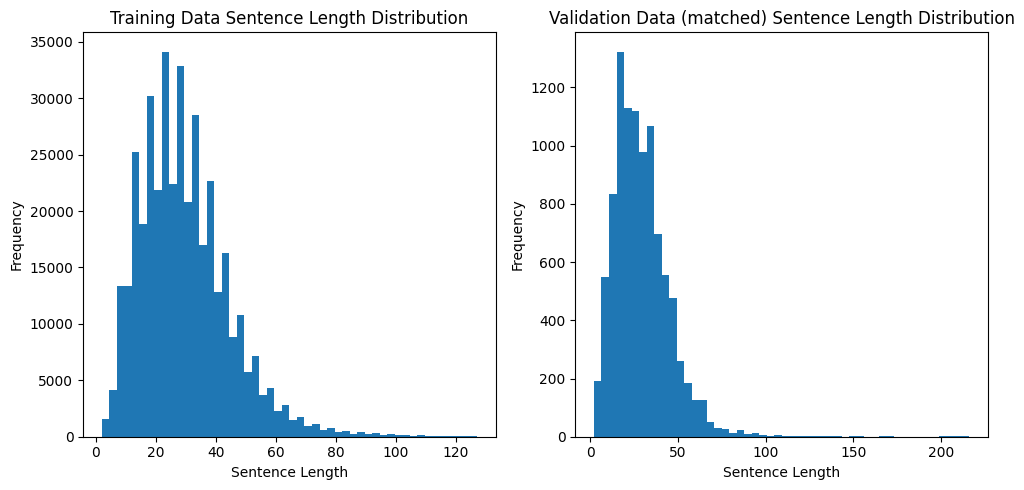

In [14]:
import matplotlib.pyplot as plt
from statistics import mean

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î¨∏Ïû• Í∏∏Ïù¥ Í≥ÑÏÇ∞
train_lengths = [len(p.split() + h.split()) for p, h in zip(sliced_ds['train']['premise'], sliced_ds['train']['hypothesis'])]
val_matched_lengths = [len(p.split() + h.split()) for p, h in zip(ds['validation_matched']['premise'], ds['validation_matched']['hypothesis'])]


# ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:")
print(f"- ÏµúÎåÄ Í∏∏Ïù¥: {max(train_lengths)}")
print(f"- ÌèâÍ∑† Í∏∏Ïù¥: {mean(train_lengths):.2f}")
print(f"\nÍ≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (matched):")
print(f"- ÏµúÎåÄ Í∏∏Ïù¥: {max(val_matched_lengths)}")
print(f"- ÌèâÍ∑† Í∏∏Ïù¥: {mean(val_matched_lengths):.2f}")

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_lengths, bins=50)
plt.title('Training Data Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(val_matched_lengths, bins=50)
plt.title('Validation Data (matched) Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## [LOG] ÌïôÏäµÎç∞Ïù¥ÌÑ∞Îäî 128Ïûê ÎØ∏Îßå, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÏõêÎ≥∏ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ

In [7]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def preprocess_function(data):
    return tokenizer(
        data["premise"],
        data["hypothesis"],
        truncation=True,
        padding=True,
        max_length=128,
    )

tokenized_ds = ds.map(preprocess_function, batched=True)
tokenized_ds

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/392052 [00:00<?, ? examples/s]

Map:   0%|          | 0/9815 [00:00<?, ? examples/s]

Map:   0%|          | 0/9832 [00:00<?, ? examples/s]

Map:   0%|          | 0/9796 [00:00<?, ? examples/s]

Map:   0%|          | 0/9847 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 392052
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9847
    })
})

In [16]:
tokenized_ds['train'][0].keys()

dict_keys(['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'])

## [MY CODE] trainÍ≥º validation ÏÖã Íµ¨Î∂Ñ

8:2Î°ú trainÏÖãÏùÑ ÎÇòÎàÑÏñ¥ÏÑú validationÏóê ÏÇ¨Ïö©

In [17]:
ds_split = tokenized_ds['train'].train_test_split(test_size=0.2)
ds_train, ds_val = ds_split['train'], ds_split['test']
ds_test = tokenized_ds['validation_matched']

HuggingFace `datasets`Î°ú Î∂àÎü¨Ïò® datasetÏùÄ `train_test_split`ÏúºÎ°ú ÏâΩÍ≤å Ï™ºÍ∞§ Ïàò ÏûàÏäµÎãàÎã§.

Îã§ÏùåÏùÄ Í∞Å splitÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§.

In [18]:
len(ds_train), len(ds_val), len(ds_test)

(313641, 78411, 9815)

## [MY CODE] Model Íµ¨ÌòÑ

bert-base-casedÎ•º Ïù¥Ïö©ÌïòÏó¨ fine-tuningÏùÑ ÏßÑÌñâÌï©ÎãàÎã§

In [19]:
id2label = {0: "Entailment", 1: "Neutral", 2: "Contradiction"}
label2id = {"Entailment": 0, "Neutral": 1, "Contradiction": 2}

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", num_labels=3, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## [MY CODE] ÌïôÏäµ ÏΩîÎìú



In [20]:
from transformers import TrainingArguments, Trainer


training_args = TrainingArguments(
    output_dir="mnli_classifier",
    num_train_epochs=10,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    logging_strategy="epoch",  # EpochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ training loss Îì±ÏùÑ logÌïòÎùºÎäî ÏùòÎØ∏
    do_train=True,  # ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    do_eval=True,  # ÌïôÏäµ Ï§ëÍ∞ÑÏóê validation dataÏóê ÎåÄÌïú ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    evaluation_strategy="epoch",  # Îß§ epochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ validation dataÏóê ÎåÄÌïú ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïúÎã§Îäî ÏùòÎØ∏
    save_strategy="epoch",  # Îß§ epochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    load_best_model_at_end=True,  # ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, validation dataÏóê ÎåÄÌïú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÑ Ï±ÑÌÉùÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    metric_for_best_model="accuracy",
    logging_dir="./logs",
    logging_steps=500
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
import evaluate

accuracy = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-22-7a1a029440b4>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [24]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=49010, training_loss=0.1828713342915309, metrics={'train_runtime': 30904.1235, 'train_samples_per_second': 101.488, 'train_steps_per_second': 1.586, 'total_flos': 2.0630788862406912e+17, 'train_loss': 0.1828713342915309, 'epoch': 10.0})

## [LOG] validation lossÎäî 3 epochÎ∂ÄÌÑ∞ Ï¶ùÍ∞Ä -> Í≥ºÏ†ÅÌï©


ÏúÑÏôÄ Í∞ôÏù¥ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ validation lossÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ Î™®Îç∏ÏùÑ Í∞ÄÏßÄÍ≥† test dataÏùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Í≤ÉÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Íµ¨ÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
test_results = trainer.evaluate(ds_test)
test_results

{'eval_loss': 0.3246372938156128,
 'eval_accuracy': 0.86464,
 'eval_runtime': 25.3668,
 'eval_samples_per_second': 985.54,
 'eval_steps_per_second': 7.727,
 'epoch': 10.0}

Ïù¥Ï†ÑÏóê ÌïôÏäµ Ïù∏ÏûêÏóêÏÑú `load_best_model_at_end=True`Î•º ÎÑòÍ≤®Ï§¨Í∏∞ ÎïåÎ¨∏Ïóê `trainer`Îäî ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, Í∏∞Î≥∏Ï†ÅÏúºÎ°ú validation lossÍ∞Ä Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÑ Í∞ÄÏßÄÍ≥† `evaluate`Î•º ÏßÑÌñâÌï©ÎãàÎã§.
Ïã§Ï†úÎ°ú Í≤∞Í≥ºÎ•º Î≥¥Î©¥ `eval_loss`Í∞Ä Í∞ÄÏû• ÎÇÆÏùÄ validation lossÏôÄ Ïú†ÏÇ¨Ìïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

ÌèâÍ∞ÄÌï† Îïå ÏÇ¨Ïö©Ìïú Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
save_path = "/content/drive/My Drive/Colab Notebooks/models"

trainer.save_model(save_path)

## [MY CODE] ÏÉà Î™®Îç∏ ÌïôÏäµ

Í∏∞Ï°¥ ÌïôÏäµÏùò Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÏßÄ Î™ªÌïòÍ≥† RuntimeÏù¥ Ï¢ÖÎ£åÎêòÎ©¥ÏÑú Îã§Ïãú ÌïôÏäµÏù¥ ÌïÑÏöîÌï¥Ï°åÏäµÎãàÎã§.
bertÍ∞Ä ÏïÑÎãå distilbertÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌïôÏäµÏãúÍ∞ÑÏùÑ Ï§ÑÏó¨Î≥¥Î†§Í≥† Ìï©ÎãàÎã§.

In [8]:
id2label = {0: "Entailment", 1: "Neutral", 2: "Contradiction"}
label2id = {"Entailment": 0, "Neutral": 1, "Contradiction": 2}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=3, id2label=id2label, label2id=label2id
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


Î≥¥ÏãúÎã§ÏãúÌîº `distilbert`Îäî Í∏∞Ï°¥Ïùò distilbert Î™®Îç∏Ïóê Ìï¥ÎãπÌïòÍ≥† ÎÇòÎ®∏ÏßÄ `pre_classifier`, `classifier`Îäî text Î∂ÑÎ•òÎ•º ÏúÑÌï¥ ÏÉàÎ°≠Í≤å Ï∂îÍ∞ÄÎêú layerÎì§ÏûÖÎãàÎã§.
Ï¶â, Îã§ÏùåÍ≥º Í∞ôÏù¥ `distilbert`Ïóê Ìï¥ÎãπÌïòÎäî parameterÎì§Îßå freezeÌïòÎ©¥ Îê©ÎãàÎã§.

In [10]:
for param in model.distilbert.parameters():
  param.requires_grad = False

## [MY CODE] ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Í≤ΩÎüâÌôî

ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÎèÑ Í∏∞Ï°¥ 8:2Î°ú validationÏùÑ ÎÇòÎàÑÎçò Í≤ÉÏùÑ
7:3ÏúºÎ°ú ÎÇòÎàÑÏñ¥ÏÑú ÌïôÏäµÏãúÍ∞ÑÏùÑ Ï°∞Í∏à Îçî Ï§ÑÏó¨Î≥¥Í≥†Ïûê Ìï©ÎãàÎã§.

In [11]:
ds_split = tokenized_ds['train'].train_test_split(test_size=0.3)
ds_train, ds_val = ds_split['train'], ds_split['test']
ds_test = tokenized_ds['validation_matched']
len(ds_train), len(ds_val), len(ds_test)

(274436, 117616, 9815)

## [MY CODE] epochÏ∂ïÏÜå

Ïù¥Î≤àÏóêÎèÑ Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÏñ¥ Í∏∞Ï°¥Ïùò Ï†àÎ∞òÏù∏ 5epochÎ°ú ÏßÑÌñâ

In [12]:
from transformers import TrainingArguments, Trainer


training_args = TrainingArguments(
    output_dir="mnli_classifier",
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    logging_strategy="epoch",  # EpochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ training loss Îì±ÏùÑ logÌïòÎùºÎäî ÏùòÎØ∏
    do_train=True,  # ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    do_eval=True,  # ÌïôÏäµ Ï§ëÍ∞ÑÏóê validation dataÏóê ÎåÄÌïú ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    evaluation_strategy="epoch",  # Îß§ epochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ validation dataÏóê ÎåÄÌïú ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïúÎã§Îäî ÏùòÎØ∏
    save_strategy="epoch",  # Îß§ epochÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    load_best_model_at_end=True,  # ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, validation dataÏóê ÎåÄÌïú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÑ Ï±ÑÌÉùÌïòÍ≤†Îã§Îäî ÏùòÎØ∏
    metric_for_best_model="accuracy",
    logging_dir="./logs",
    logging_steps=500
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


ÎÇòÎ®∏ÏßÄÎäî Í∏∞Ï°¥Ïùò ÌïôÏäµÍ≥ºÏ†ïÍ≥º ÏôÑÏ†ÑÌûà ÎèôÏùºÌï©ÎãàÎã§. `training_args`Îäî Í∏∞Ï°¥Í≥º ÎòëÍ∞ôÏù¥ ÌôúÏö©Ìï† Îïå distilbertÎ•º fine-tuningÌïòÎäî ÏΩîÎìúÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [13]:
import evaluate

accuracy = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [14]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-14-7a1a029440b4>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [15]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=21445, training_loss=1.0775259247857891, metrics={'train_runtime': 3484.4225, 'train_samples_per_second': 393.804, 'train_steps_per_second': 6.155, 'total_flos': 4.544308917047808e+16, 'train_loss': 1.0775259247857891, 'epoch': 5.0})

In [16]:
save_path = "/content/drive/My Drive/Colab Notebooks/models"

trainer.save_model(save_path)

ÌïôÏäµÌïú Î™®Îç∏Ïóê ÎåÄÌïú Í≤∞Í≥ºÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [17]:
test_results = trainer.evaluate(ds_test)
test_results

{'eval_loss': 1.0681017637252808,
 'eval_accuracy': 0.4214977075904228,
 'eval_runtime': 16.8442,
 'eval_samples_per_second': 582.693,
 'eval_steps_per_second': 9.143,
 'epoch': 5.0}

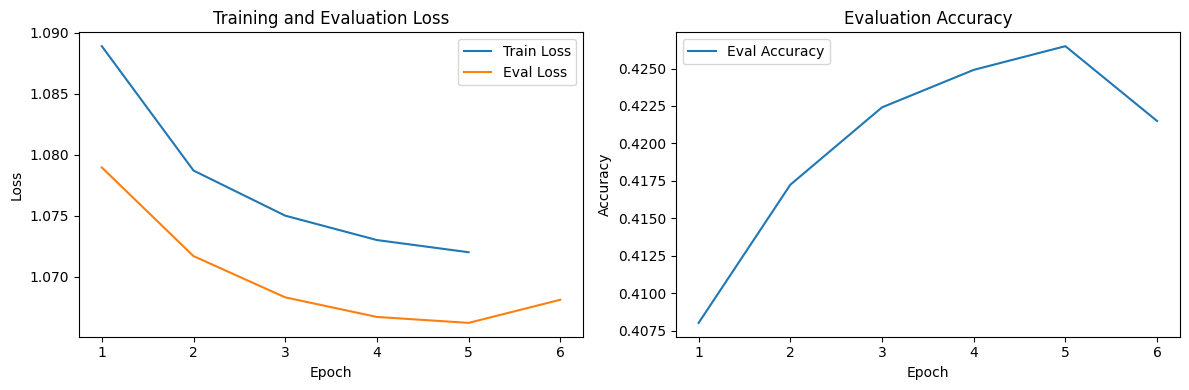

In [21]:
import matplotlib.pyplot as plt

# loss Í∞í Ï∂îÏ∂ú
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# accuracy Í∞í Ï∂îÏ∂ú
eval_accuracy = [log['eval_accuracy'] for log in trainer.state.log_history if 'eval_accuracy' in log]


# epoch Í∞í Ï∂îÏ∂ú (eval_lossÎ•º Í∏∞Ï§ÄÏúºÎ°ú)
epochs = range(1, len(eval_loss) + 1)

# Loss Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 4))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï

plt.subplot(1, 2, 1)  # 1x2 Í∑∏Î¶¨ÎìúÏùò Ï≤´ Î≤àÏß∏ subplot
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(eval_loss) + 1), eval_loss, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()

# Accuracy Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.subplot(1, 2, 2)  # 1x2 Í∑∏Î¶¨ÎìúÏùò Îëê Î≤àÏß∏ subplot
plt.plot(epochs, eval_accuracy, label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Evaluation Accuracy')
plt.legend()

plt.tight_layout()  # subplot Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()

## [MY CODE] Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏßÄ ÏïäÏïÑÏÑú distilbertÎèÑ ÌïôÏäµ


bertÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÎäî 80%Í∞Ä ÎÑòÍ≤å ÎÇòÏôîÎäîÎç∞, distilbertÎ°ú ÌïôÏäµÌïòÎãà 50%Í∞Ä ÎÇòÏò§ÏßÄ ÏïäÏùå. Îã®ÏàúÌûà pretrainedÎ™®Îç∏Ïùò Ï∞®Ïù¥Ïù∏ÏßÄ, pretrainedÎ™®Îç∏ÏùÑ ÌïôÏäµÏóêÏÑú Î∞∞Ï†úÌï¥ÏÑú Ïù∏ÏßÄ ÌôïÏù∏ ÌïòÍ∏∞ ÏúÑÌï¥ distilbertÎèÑ ÌïôÏäµÏù¥ ÎêòÎèÑÎ°ù ÏàòÏ†ï

In [22]:
for param in model.distilbert.parameters():
  param.requires_grad = True

In [23]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-23-7a1a029440b4>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [24]:
trainer.train()

TrainOutput(global_step=21445, training_loss=0.7193739617335043, metrics={'train_runtime': 7237.2949, 'train_samples_per_second': 189.598, 'train_steps_per_second': 2.963, 'total_flos': 4.544308917047808e+16, 'train_loss': 0.7193739617335043, 'epoch': 5.0})

In [25]:
save_path = "/content/drive/My Drive/Colab Notebooks/models"

trainer.save_model(save_path)

In [26]:
test_results = trainer.evaluate(ds_test)
test_results

{'eval_loss': 0.7919292449951172,
 'eval_accuracy': 0.6751910341314314,
 'eval_runtime': 16.7976,
 'eval_samples_per_second': 584.309,
 'eval_steps_per_second': 9.168,
 'epoch': 5.0}

## [LOG] Ï†ïÌôïÎèÑ 67.5%

distilbertÎèÑ Ìï®Íªò ÌïôÏäµÌï¥Ïïº Ï†ïÌôïÎèÑÍ∞Ä Ïûò Ïò¨ÎùºÍ∞ê

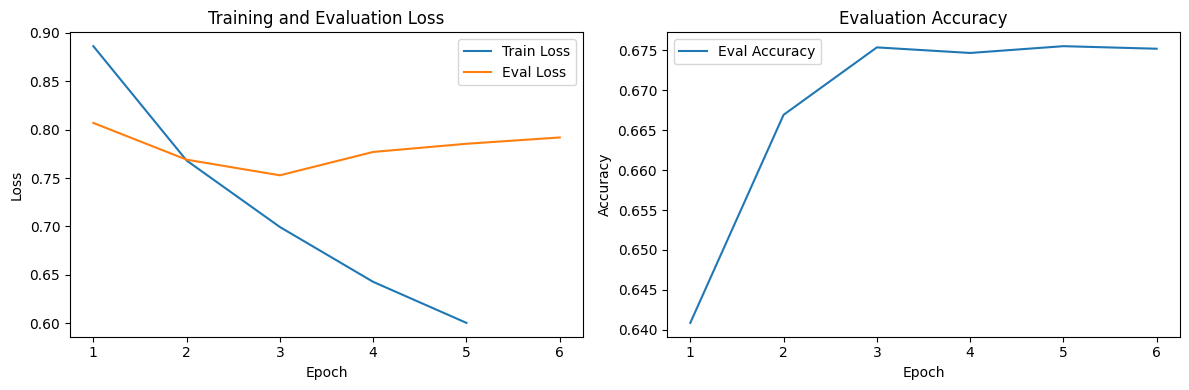

In [27]:
import matplotlib.pyplot as plt

# loss Í∞í Ï∂îÏ∂ú
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# accuracy Í∞í Ï∂îÏ∂ú
eval_accuracy = [log['eval_accuracy'] for log in trainer.state.log_history if 'eval_accuracy' in log]


# epoch Í∞í Ï∂îÏ∂ú (eval_lossÎ•º Í∏∞Ï§ÄÏúºÎ°ú)
epochs = range(1, len(eval_loss) + 1)

# Loss Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 4))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï

plt.subplot(1, 2, 1)  # 1x2 Í∑∏Î¶¨ÎìúÏùò Ï≤´ Î≤àÏß∏ subplot
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(eval_loss) + 1), eval_loss, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()

# Accuracy Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.subplot(1, 2, 2)  # 1x2 Í∑∏Î¶¨ÎìúÏùò Îëê Î≤àÏß∏ subplot
plt.plot(epochs, eval_accuracy, label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Evaluation Accuracy')
plt.legend()

plt.tight_layout()  # subplot Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()

## [LOG] 3epoch Ïù¥ÌõÑÎ°úÎäî Ï†ïÌôïÎèÑÍ∞Ä Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùå

In [28]:
trainer.state.log_history

[{'loss': 0.8863,
  'grad_norm': 14.24431037902832,
  'learning_rate': 1.6000000000000003e-05,
  'epoch': 1.0,
  'step': 4289},
 {'eval_loss': 0.8069390058517456,
  'eval_accuracy': 0.6408736906543328,
  'eval_runtime': 202.2548,
  'eval_samples_per_second': 581.524,
  'eval_steps_per_second': 9.088,
  'epoch': 1.0,
  'step': 4289},
 {'loss': 0.7681,
  'grad_norm': 11.888326644897461,
  'learning_rate': 1.2e-05,
  'epoch': 2.0,
  'step': 8578},
 {'eval_loss': 0.7689952254295349,
  'eval_accuracy': 0.6669160658413821,
  'eval_runtime': 202.2647,
  'eval_samples_per_second': 581.495,
  'eval_steps_per_second': 9.087,
  'epoch': 2.0,
  'step': 8578},
 {'loss': 0.6994,
  'grad_norm': 11.186877250671387,
  'learning_rate': 8.000000000000001e-06,
  'epoch': 3.0,
  'step': 12867},
 {'eval_loss': 0.7528361082077026,
  'eval_accuracy': 0.6753587947218066,
  'eval_runtime': 202.2913,
  'eval_samples_per_second': 581.419,
  'eval_steps_per_second': 9.086,
  'epoch': 3.0,
  'step': 12867},
 {'loss

## [FEEDBACK] Ïôú eval_loss Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïòÎÇò Îçî ÏÉùÏÑ±ÎêòÎÇòÏöî?

log_historyÎ•º Î≥¥Î©¥ train_runtimeÏù¥ÌõÑÏóê ÌïúÎ≤à Îçî ÏÉùÏÑ±Ïù¥ ÎêòÎäîÎç∞, trainer.evaluate()Î•º Ìï¥ÏÑú Í∑∏Îü∞Í∞ÄÏöî?

